#Importing necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

#Load the dataset

In [ ]:
df = pd.read_csv("amazon_data.csv")

#Exploratory Data Analysis

In [ ]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [ ]:
df.tail()

,review,rating
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5
9975,NiceREAD MORE,5


In [ ]:
df.shape

(9976, 2)

In [ ]:
df.columns

Index(['review', 'rating'], dtype='object')

In [ ]:
df.isnull().sum()

,0
review,0
rating,0


In [ ]:
df.duplicated().sum()

2108

In [ ]:
df=df.drop_duplicates()


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7868 entries, 0 to 9974
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  7868 non-null   object
 1   rating  7868 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 184.4+ KB


In [ ]:
df.describe()

,rating
count,7868.000000
mean,4.144255
std,1.221667
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['review'], dtype='object')

Numerical type columns:
Index(['rating'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: ['review']
Discrete Features: ['rating']
Continuous Features: []


In [ ]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

rating
[5 4 1 3 2]



In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

rating
5    4347
4    1851
3     759
1     631
2     280
Name: count, dtype: int64



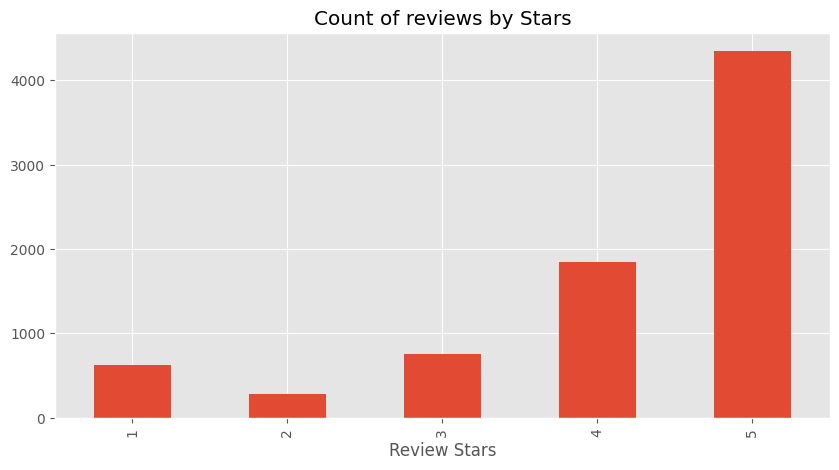

In [ ]:
ax=df['rating'].value_counts().sort_index() \
    .plot(kind='bar',title='Count of reviews by Stars',
          figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Balancing the dataset


In [ ]:
ratings = df['rating'].unique()
balanced_df = pd.DataFrame()

for rating in ratings:
    subset = df[df['rating'] == rating]
    resampled_subset = resample(subset, replace=True, n_samples=2000, random_state=42)  # 2000 samples per class
    balanced_df = pd.concat([balanced_df, resampled_subset])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(balanced_df['review']).toarray()
y = balanced_df['rating']

#Model Training and Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8515
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       377
           2       0.95      0.97      0.96       416
           3       0.86      0.86      0.86       399
           4       0.75      0.69      0.72       409
           5       0.73      0.78      0.76       399

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



#Rating Prediction

In [ ]:
def predict_rating(review):
    review_vector = vectorizer.transform([review]).toarray()
    predicted_rating = rf_classifier.predict(review_vector)[0]
    return predicted_rating
user_review = input("Enter a review: ")
predicted_rating = predict_rating(user_review)
print(f"The predicted rating for the review is: {predicted_rating}")

Enter a review: good
The predicted rating for the review is: 4


#Using VADER

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def predict_rating_vader(review):
    sentiment_scores = sia.polarity_scores(review)
    sentiment_score = sentiment_scores['compound']

    print(f"Positive: {sentiment_scores['pos']}")
    print(f"Negative: {sentiment_scores['neg']}")
    print(f"Neutral: {sentiment_scores['neu']}")
    print(f"Compound: {sentiment_scores['compound']}")

    if sentiment_score >= 0.5:
        predicted_rating = 5
    elif sentiment_score >= 0.3:
        predicted_rating = 4
    elif sentiment_score <= -0.4:
        predicted_rating = 1
    elif sentiment_score <= -0.05:
        predicted_rating = 2
    else:
        predicted_rating = 3
    return predicted_rating


In [ ]:
user_review = input("Enter a review: ")
predicted_rating = predict_rating_vader(user_review)
print(f"The predicted rating for the review is: {predicted_rating}")

Enter a review: I am not satisfied with the product.
Positive: 0.0
Negative: 0.318
Neutral: 0.682
Compound: -0.3252
The predicted rating for the review is: 2


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
def predict_rating_gradio(review):
    predicted_rating = predict_rating_vader(review)
    return predicted_rating
iface = gr.Interface(
    fn=predict_rating_gradio,
    inputs=gr.Textbox(lines=5, placeholder="Enter your review here..."),
    outputs="number",
    title="Rating Prediction",
    description="Enter a product review and get a predicted rating (1-5 stars).",
)
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cf0c2ab4b8d8da67cb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
